In [7]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.ticker as ticker


print(os.getcwd())
with open(f'{os.getcwd()}/convergence_rate.txt', 'r') as file:
    content = file.read()

convergence_rate_dict = defaultdict(lambda: defaultdict(int))
for line in content.split('\n'):
    d, per, n_converged, n_not_converged = line.split(' ')[:]
    convergence_rate_dict[d][round(float(per),5)] = (int(n_converged), int(n_not_converged))


/home/luca/Documents/codeRepos/cc-decoding/src/mqt/qecc/cc_decoder


d=3
d=4
d=5


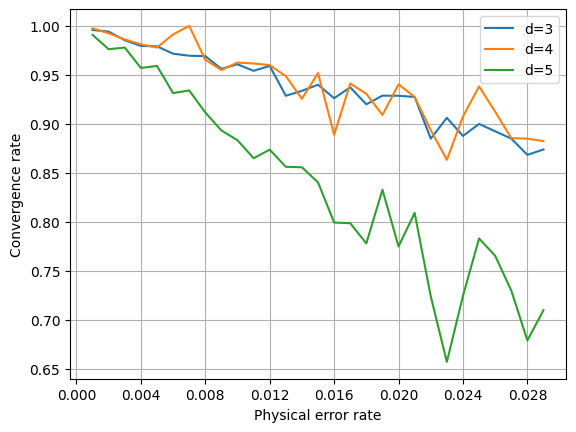

In [9]:

for d in convergence_rate_dict:
    print(f'd={d}')
    pers = []
    convergence_rates = []
    for per in convergence_rate_dict[d]:
        pers.append(per)
    pers.sort()

    for per in pers:
        n_converged, n_not_converged = convergence_rate_dict[d][per]
        convergence_rates.append(n_converged / (n_converged + n_not_converged))
    plt.plot(pers, convergence_rates, label=f'd={d}')

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
ax.grid()

plt.legend()
plt.ylabel('Convergence rate')
plt.xlabel('Physical error rate')
plt.savefig('convergence.svg')